<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
# !wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey_data_clean.csv")

# Display the first few rows to understand the structure of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Unknown,Unknown,86155.287263,Unknown
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.000000,Unknown,Unknown,86155.287263,Unknown
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Appropriate in length,Easy,86155.287263,Unknown
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too long,Easy,86155.287263,Unknown
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too short,Easy,86155.287263,Unknown


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



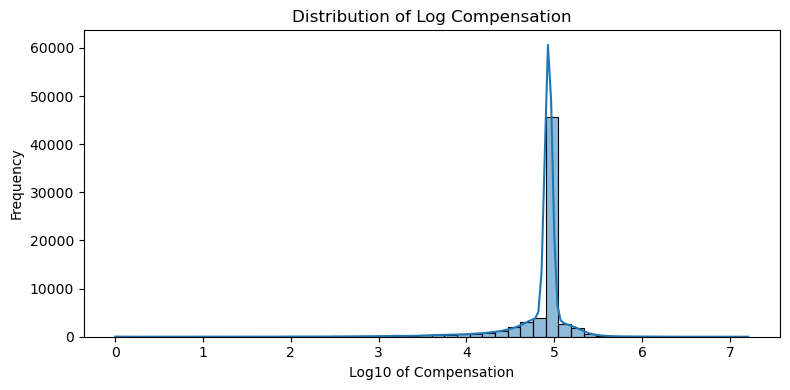

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker 
df['ConvertedCompYearly'].dropna()
df['CompTotal_log'] = df['ConvertedCompYearly'].apply(lambda x: np.log10(x) if x > 0 else np.nan)
plt.figure(figsize=(8, 4))
sns.histplot(df['CompTotal_log'], bins=50, kde=True)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title("Distribution of Log Compensation")
plt.xlabel("Log10 of Compensation")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

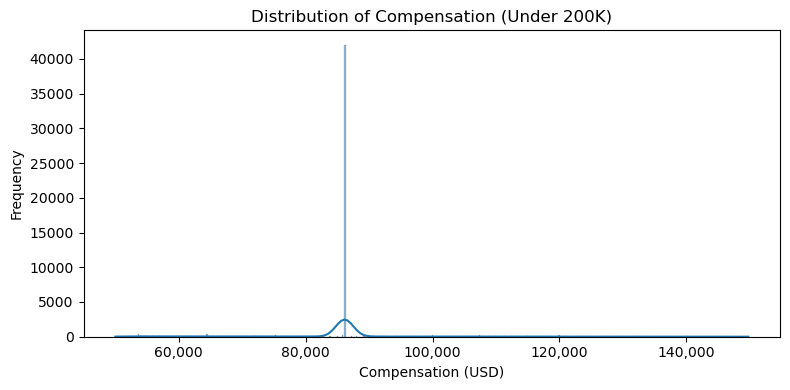

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Drop missing values and filter out compensation >= 200,000
comp_filtered = df['ConvertedCompYearly'].dropna()
comp_filtered = comp_filtered[(comp_filtered > 50_000) & (comp_filtered < 150_000)]

# Plot
plt.figure(figsize=(8, 4))
sns.histplot(comp_filtered, bins=500, kde=True)

# Format X-axis with thousands separator
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title("Distribution of Compensation (Under 200K)")
plt.xlabel("Compensation (USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



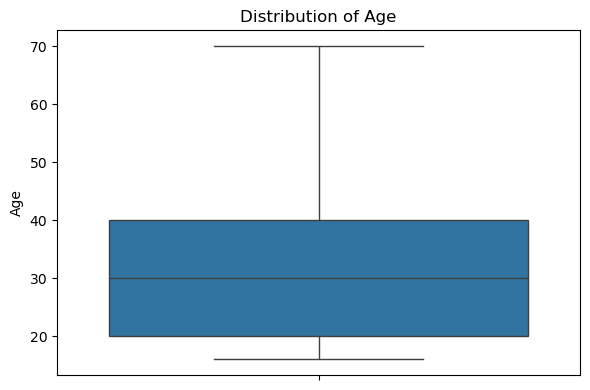

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

df_clean = df.dropna(subset=['Age'])


age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
}
df_clean['AgeNumeric'] = df['Age'].map(age_map)

plt.figure(figsize=(6, 4))
sns.boxplot(y='AgeNumeric', data=df_clean)  # y-axis only since there's no category

# Add labels and title
plt.title('Distribution of Age')
plt.ylabel('Age')

# Show plot
plt.tight_layout()
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



C:\Users\serge\AppData\Local\Temp\ipykernel_9308\3168407486.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Size'] = df_clean['AgeNumeric'].astype(float) * 100


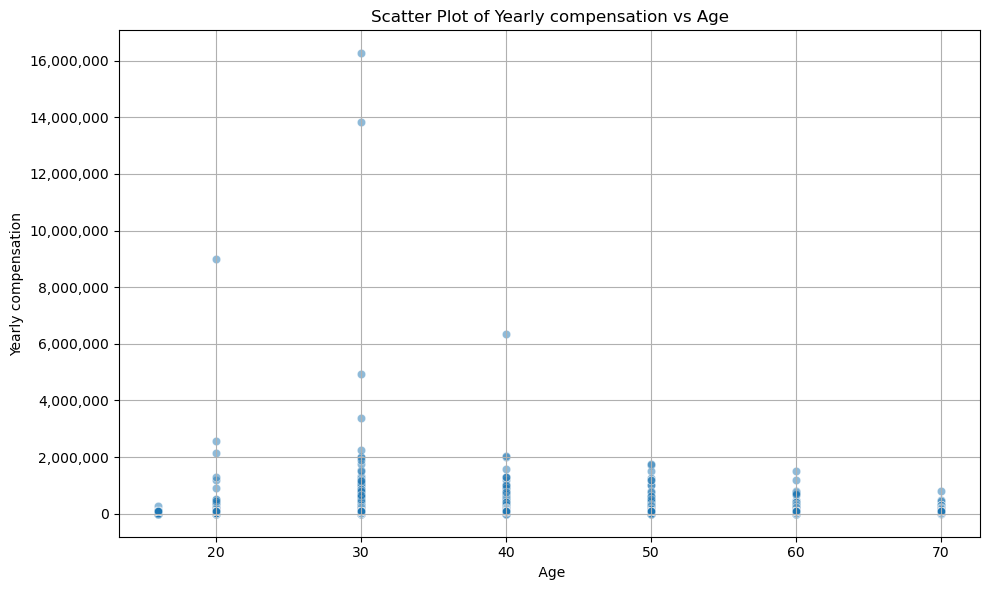

In [16]:
# X = ConvertedCompYearly , Y = JobSat

# size - Age 

import matplotlib.pyplot as plt
import seaborn as sns

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
}
df['AgeNumeric'] = df['Age'].map(age_map)


# Ensure both columns are numeric

df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

df['AgeNumeric'] = pd.to_numeric(df['AgeNumeric'], errors='coerce')


# Drop rows with missing CompTotal or Age
df_clean = df.dropna(subset=['ConvertedCompYearly','AgeNumeric'])

# Normalize size (optional: adjust multiplier for better visual scaling)
df_clean['Size'] = df_clean['AgeNumeric'].astype(float) * 100


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='AgeNumeric', y='ConvertedCompYearly',  sizes=(10, 500), alpha=0.5, legend=False)


import matplotlib.ticker as ticker 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))



# Add titles and labels
plt.title("Scatter Plot of Yearly compensation vs Age")
plt.xlabel(" Age")
plt.ylabel("Yearly compensation")
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


C:\Users\serge\AppData\Local\Temp\ipykernel_9308\3089793849.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Size'] = df_clean['AgeNumeric'].astype(float) * 100


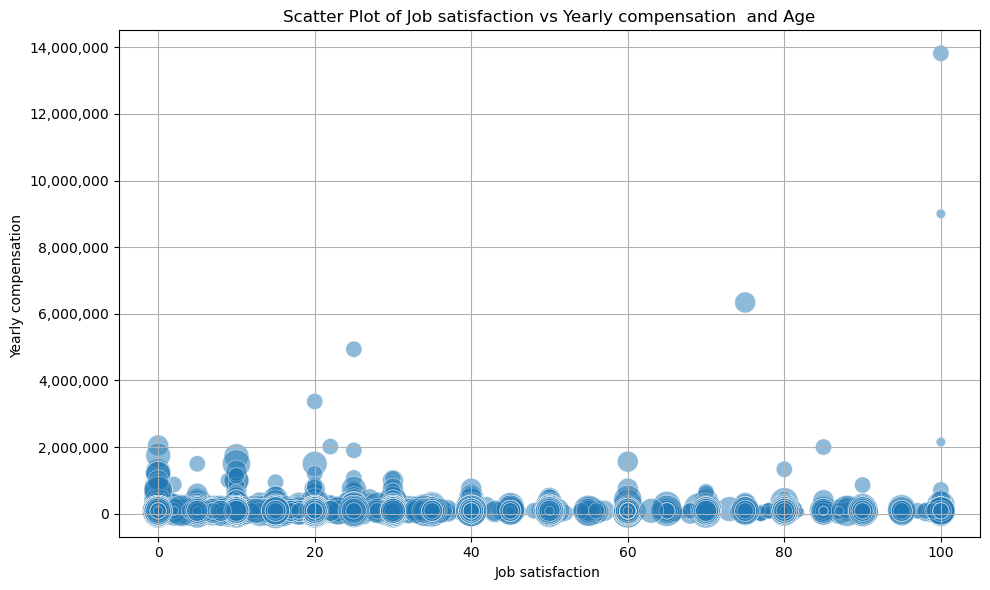

In [19]:
# X = ConvertedCompYearly , Y = JobSat

# size - Age 

import matplotlib.pyplot as plt
import seaborn as sns

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
}
df['AgeNumeric'] = df['Age'].map(age_map)


# Ensure both columns are numeric

df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['AgeNumeric'] = pd.to_numeric(df['AgeNumeric'], errors='coerce')


# Drop rows with missing CompTotal or Age
df_clean = df.dropna(subset=['ConvertedCompYearly','JobSatPoints_6','AgeNumeric'])

# Normalize size (optional: adjust multiplier for better visual scaling)
df_clean['Size'] = df_clean['AgeNumeric'].astype(float) * 100

# Sample DataFrame (replace with your actual df)
# Let's assume 'Age' and 'CompTotal' are numeric
# sns.scatterplot(data=df, x='ConvertedCompYearly', y='JobSatPoints_6', alpha=0.6)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='JobSatPoints_6', y='ConvertedCompYearly', size='Size', sizes=(10, 500), alpha=0.5, legend=False)


import matplotlib.ticker as ticker 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))



# Add titles and labels
plt.title("Scatter Plot of Job satisfaction vs Yearly compensation  and Age")
plt.xlabel("Job satisfaction ")
plt.ylabel("Yearly compensation ")
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



In [25]:
df['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64

C:\Users\serge\AppData\Local\Temp\ipykernel_9308\3525438311.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=MB_Count.values, y=MB_Count.index, palette='Blues_d')


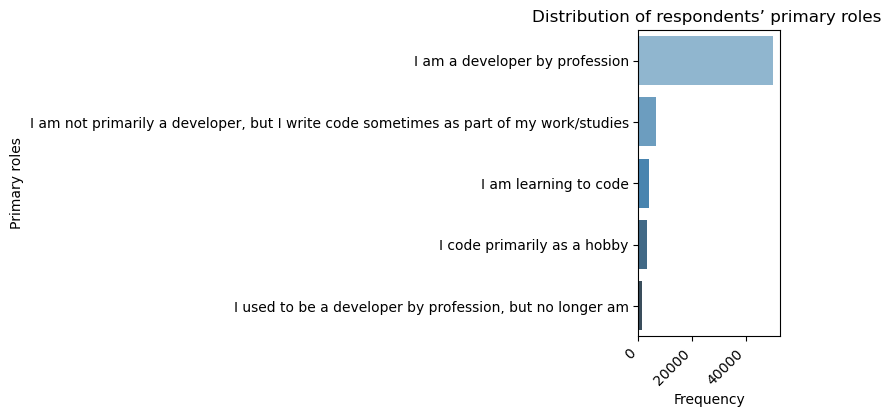

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker 
df_clean['MainBranch'].dropna()
MB_Count = df['MainBranch'].value_counts()
MB_Count
# MB_Count = df_clean.groupby('ExperienceRange')['JobSatPoints_6'].mean().reset_index()



plt.figure(figsize=(8, 4))
sns.barplot(x=MB_Count.values, y=MB_Count.index, palette='Blues_d')
# plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title("Distribution of respondents’ primary roles ")
plt.xlabel("Frequency")
plt.ylabel("Primary roles")
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



C:\Users\serge\AppData\Local\Temp\ipykernel_9308\232349125.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=LG_Count.index, y=LG_Count.values, palette='Blues_d')


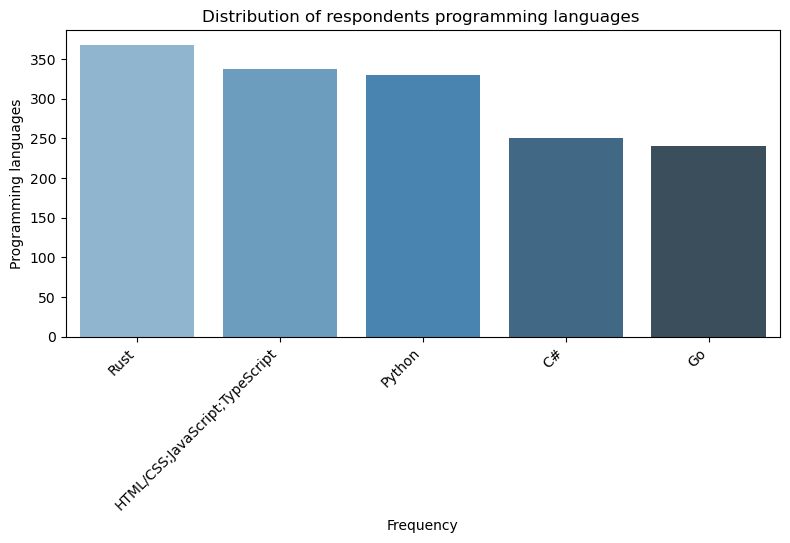

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker 
df_clean['LanguageWantToWorkWith'].dropna()
LG_Count = df_clean['LanguageWantToWorkWith'].value_counts().head(5)


plt.figure(figsize=(8, 4))
sns.barplot(x=LG_Count.index, y=LG_Count.values, palette='Blues_d')

plt.title("Distribution of respondents programming languages ")
plt.xlabel("Frequency")
plt.ylabel("Programming languages")
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


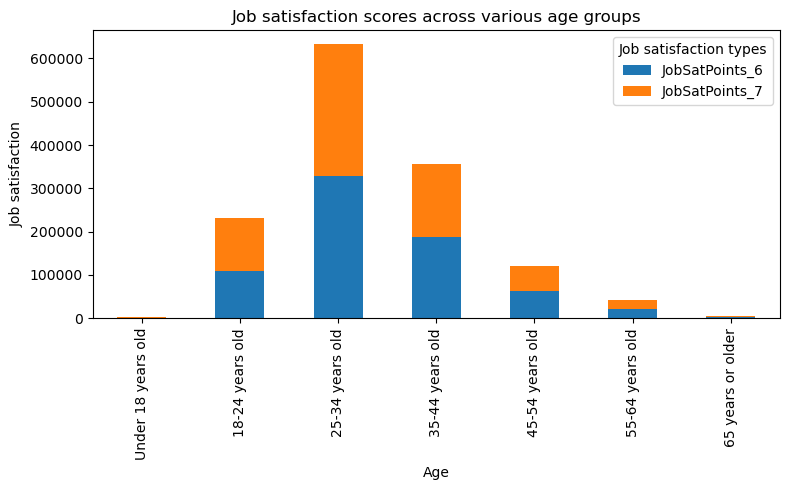

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker 

df_clean = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

df_grouped = df_clean.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].sum()

age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
]

df_grouped = df_grouped.loc[age_order]

df_grouped.plot(kind='bar', stacked=True, figsize=(8, 5))

# Formatting
plt.title('Job satisfaction scores across various age groups')
plt.xlabel('Age')
plt.ylabel('Job satisfaction')
plt.legend(title='Job satisfaction types')
plt.tight_layout()
plt.show()





##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



C:\Users\serge\AppData\Local\Temp\ipykernel_9308\542137839.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=DBCount.index, y=DBCount.values, palette='Blues_d')


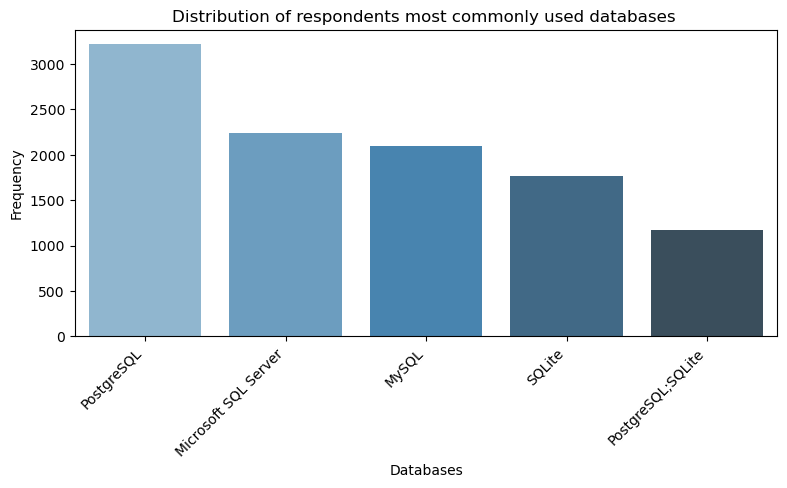

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker 
df_clean = df[['DatabaseHaveWorkedWith']].dropna()
DBCount = df_clean['DatabaseHaveWorkedWith'].value_counts().head(5)


plt.figure(figsize=(8, 4))
sns.barplot(x=DBCount.index, y=DBCount.values, palette='Blues_d')

plt.title("Distribution of respondents most commonly used databases ")
plt.xlabel("Databases")
plt.ylabel("Frequency")
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



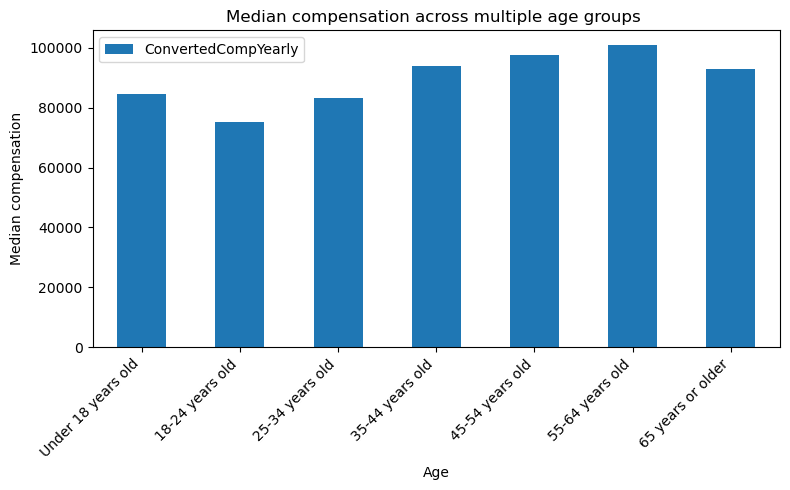

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker 

df_clean = df[['Age','ConvertedCompYearly']].dropna()

df_grouped = df_clean.groupby('Age')[['ConvertedCompYearly']].mean()

age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
]

df_grouped = df_grouped.loc[age_order]

df_grouped.plot(kind='bar', stacked=False, figsize=(8, 5))

# Formatting
plt.title('Median compensation across multiple age groups ')
plt.xlabel('Age')
plt.ylabel('Median compensation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()





##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [102]:
df['Country'].value_counts()

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
                                                        ...  
Central African Republic                                    1
Equatorial Guinea                                           1
Niger                                                       1
Guinea                                                      1
Solomon Islands                                             1
Name: count, Length: 185, dtype: int64

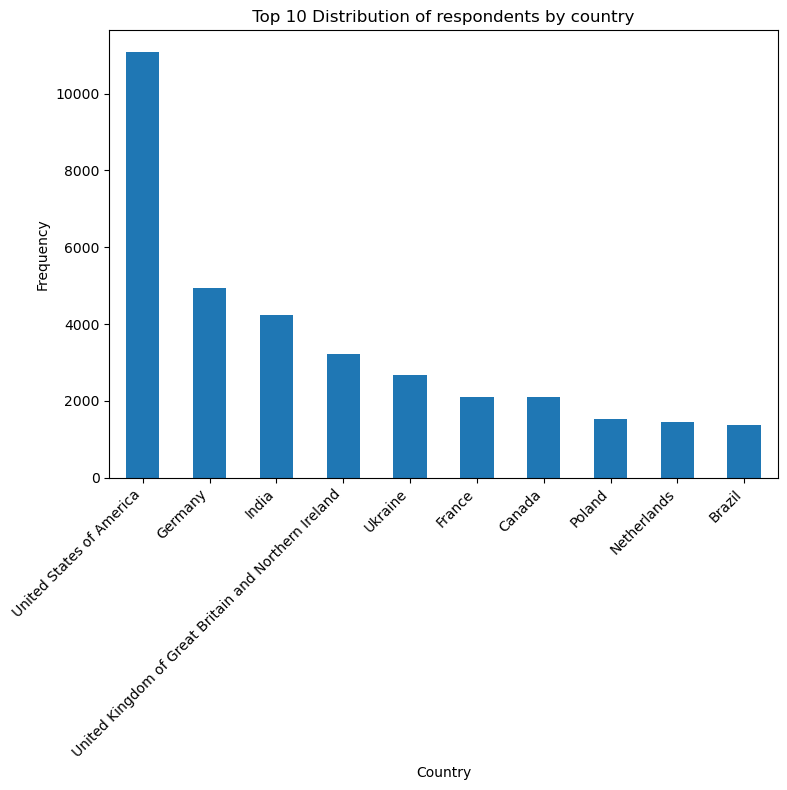

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker 

df_clean = df[['Country']].dropna()
Resp_counts = df_clean['Country'].value_counts().head(10)

Resp_counts.plot(kind='bar', stacked=False, figsize=(8, 8))

# Formatting
plt.title(' Top 10 Distribution of respondents by country ')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
